# Workflow:
https://github.com/akcarsten/cook_book/blob/master/01_create_first_dataset.ipynb

## Preparation for the training

1.Put pictures in the folder

2.Create subfolder for each type of thistle

3.Crop them 

4.Put in the correct subfolder

5.Import

6.black and white

7.resize w/ openCV

8.Create IDX dataset (Actually don't need, out put = pth)

## Actual training

1. Split dataset into 3 subsets (80% training, 10% Verification, 10% validation)

## Limitations for now


1. Offline training
2. Black and white

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
#import util
#import scipy.misc
#import imageio
#from idx_tools import Idx
import os

In [5]:
#parameters
delete_directories_at_start = True

In [10]:
#Some cleaning
import shutil

dirPath = ['dataset', 'ProcessedThistle']
print("Processing: {}".format(dirPath))

if delete_directories_at_start:
    print("delete_directories_at_start is set to: True...")
    for i in dirPath:
        dirPath = './{}'.format(i);
        if os.path.exists(dirPath):
            print('{} exists, removing...'.format(i))
            # Delete all contents of a directory using sh#Prepare final folders
            shutil.rmtree(dirPath)
        else:
            print('{} doesn''t exists, ignoring...'.format(i))

Processing: ['dataset', 'ProcessedThistle']
delete_directories_at_start is set to: True...
dataset doesnt exists, ignoring...
ProcessedThistle doesnt exists, ignoring...


In [11]:
#Create raw data folder
if not os.path.exists("./RawThistle"):
    os.makedirs("./RawThistle")
    print("The folder {} didn't exist so it has been created".format("RawThistle"))

In [13]:
#Rename the files in the raw image folder so they are named sequencially (predictive manner)

#https://stackoverflow.com/questions/25580744/python-rename-files-and-give-them-sequential-number

print(os.listdir('./RawThistle/.'))
n = 0
for i in os.listdir('./RawThistle/.'):
    if not i == ".ipynb_checkpoints":
        print('Renaming ' + i + ' as ' + './RawThistle/' + "{:05d}.jpg".format(n))
        os.rename('./RawThistle/' + i, './RawThistle/' + "{:05d}.jpg".format(n))
        n += 1

['.ipynb_checkpoints', '00004.jpg', '00003.jpg', '00000.jpg', '00001.jpg', '00005.jpg', '00002.jpg']
Renaming 00004.jpg as ./RawThistle/00000.jpg
Renaming 00003.jpg as ./RawThistle/00001.jpg
Renaming 00000.jpg as ./RawThistle/00002.jpg
Renaming 00001.jpg as ./RawThistle/00003.jpg
Renaming 00005.jpg as ./RawThistle/00004.jpg
Renaming 00002.jpg as ./RawThistle/00005.jpg


In [14]:
#Create our dataset folder
if not os.path.exists("./dataset"):
    os.makedirs("./dataset")
    print("The folder {} didn't exist so it has been created".format("dataset"))

The folder dataset didn't exist so it has been created


In [15]:
# 04_Variegated 03_Scotch 02_Winged 01_Nodding
ThistleTypes = ["Nodding" , "Spear"]

Results_dirs  = [("dataset/{}".format(i)) for i in ThistleTypes]

# we have this "try/except" statement because these next functions can throw an error if the directories exist already
for i in range(0, len(Results_dirs)):
    try:  
        os.makedirs(Results_dirs[i])
        print('Directory {} created'.format(Results_dirs[i]))
    except FileExistsError:
        print('Directory {} not created because it already exists'.format(Results_dirs[i]))
        try:
            shutil.rmtree(dirPath)
            print('{} has been deleted'.format(Results_dirs[i]))
        except:
            print('Error while deleting {}'.format(Results_dirs[i]))
        else:
            print('{} doesn''t exists'.format(Results_dirs[i]))
    

Directory dataset/Nodding created
Directory dataset/Spear created


In [9]:
#Checking your OpenCV
print('The openCV used is {}'.format(cv2.__version__))

#Checking your CUDA version
!nvcc --version

#Checking your Ubuntu version
!g++ --version

#https://jkjung-avt.github.io/opencv3-on-tx2/
#https://github.com/mdegans/nano_build_opencv
#Please use below link to install OpenCV3.x with cuda support. There are some issue in opencv3.3 and CUDA9, so we disable CUDA in Jetpack3.2 DP.
#https://jkjung-avt.github.io/opencv3-on-tx2/
#https://devtalk.nvidia.com/default/topic/1029172/jetson-tx2/jetpacks-opencv-with-cuda/

#Checking your cuDNN version
!whereis cuda

!jetson_release

The openCV used is 3.3.1
/bin/sh: 1: nvcc: not found
g++ (Ubuntu/Linaro 7.4.0-1ubuntu1~18.04.1) 7.4.0
Copyright (C) 2017 Free Software Foundation, Inc.
This is free software; see the source for copying conditions.  There is NO
warranty; not even for MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE.

cuda: /usr/local/cuda
 - NVIDIA Jetson NANO/TX1
   * Jetpack 4.2 [L4T 32.1.0]
   * CUDA GPU architecture 5.3
 - Libraries:
   * CUDA 10.0.166
   * cuDNN 7.3.1.28-1+cuda10.0
   * TensorRT 5.0.6.3-1+cuda10.0
   * Visionworks 1.6.0.500n
   * OpenCV 3.3.1 compiled CUDA: NO
 - Jetson Performance: inactive


Using cmd line: jtop (GUI) or just jetson_release(CLI)

NVIDIA Jetson NANO/TX1 - Jetpack 4.2 [L4T 32.1.0]

  - Up Time: 0 days 2:21:51                                                                                                                                                Version: 1.7.7
  - Board:                                                                                                                                                                  Author: Raffaello Bonghi
    * Name:           NVIDIA Jetson NANO/TX1                                                                                                                                e-mail: raffaello@rnext.it
    * Type:           NANO/TX1
    * Jetpack:        4.2 [L4T 32.1.0]
    * GPU-Arch:       5.3
    * SN:             14219190849530800501
  - Libraries:
    * CUDA:           10.0.166
    * cuDNN:          7.3.1.28-1+cuda10.0
    * TensorRT:       5.0.6.3-1+cuda10.0
    * VisionWorks:    1.6.0.500n
    * OpenCV:         3.3.1 compiled CUDA: NO
  - Hostname: jetbot
  - Interfaces
    * wlan0:          192.168.1.70
    * l4tbr0:         192.168.55.1
    * docker0:        172.17.0.1

Processing: ['.ipynb_checkpoints', '00004.jpg', '00003.jpg', '00005.jpg']
Processing: 00004.jpg


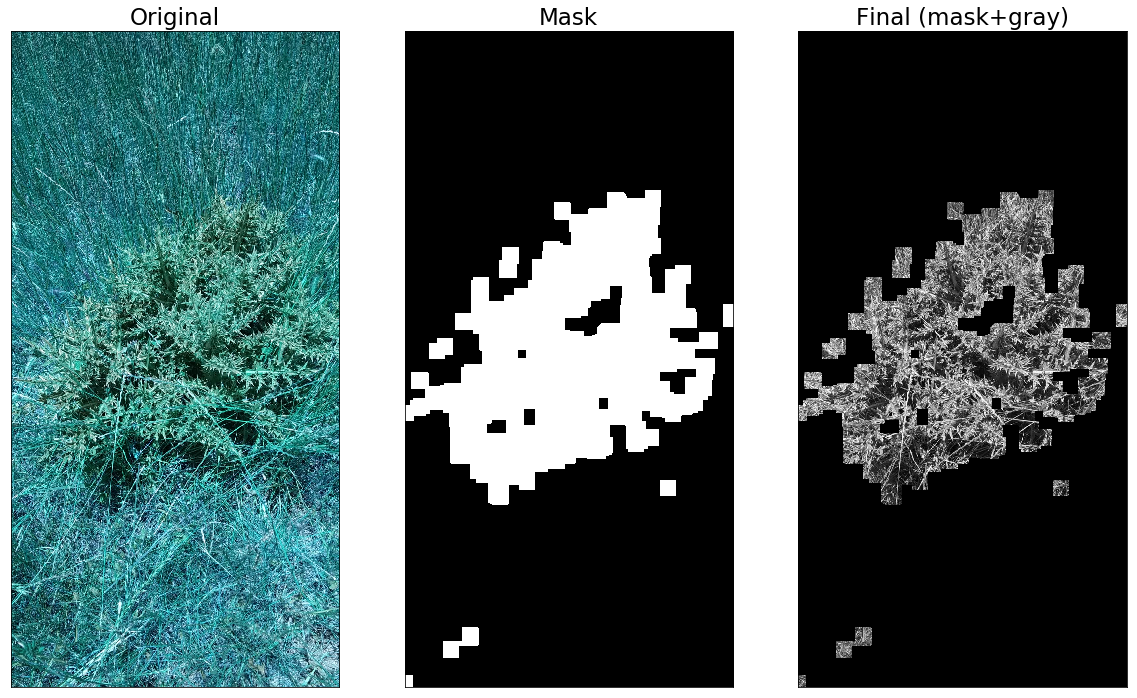

Processing: 00003.jpg


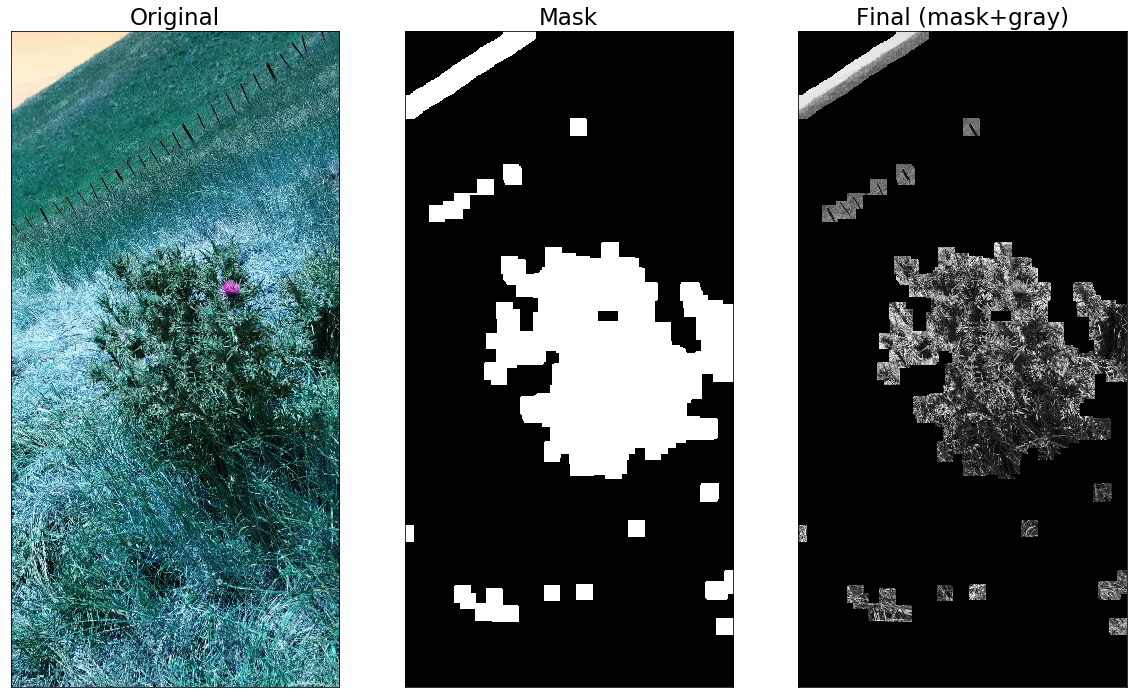

Processing: 00005.jpg


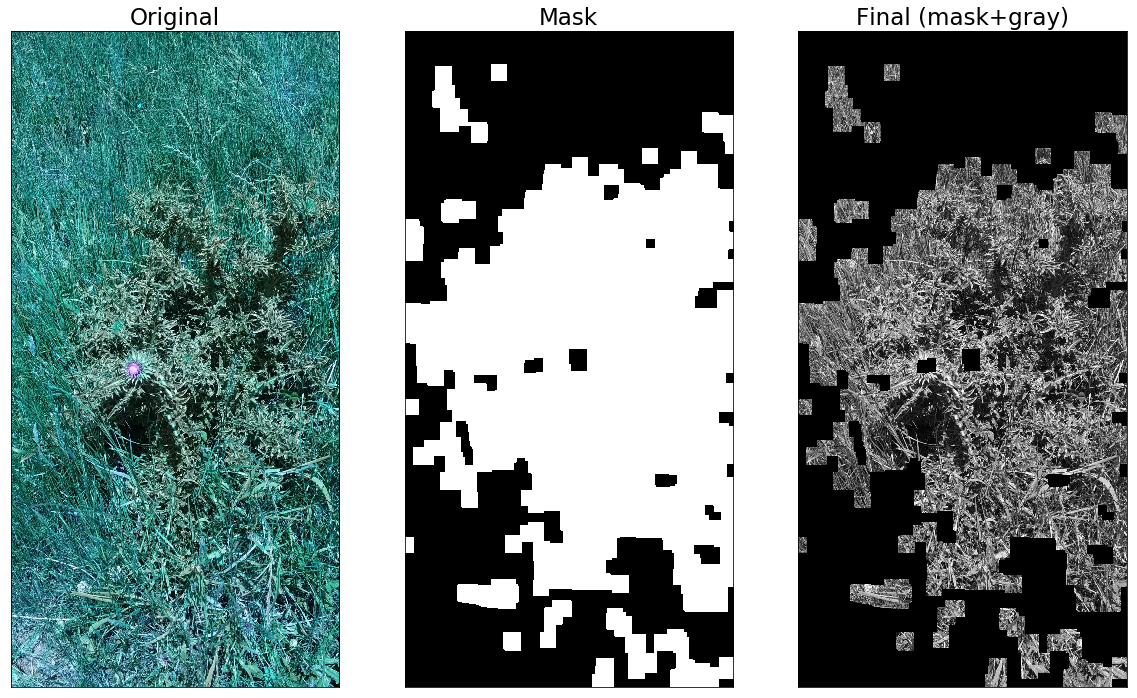

In [12]:
import numpy as np

save_processed_image = True

if not os.path.exists("./ProcessedThistle"):
    os.makedirs("./ProcessedThistle")
    print("The folder {} didn't exist so it has been created".format("ProcessedThistle"))

def convert_image(img):
    # Convert BGR to HSV
    hsv           = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
    hsv_hystersis = cv2.inRange(hsv, (40,10,0), (60,200,255))
    kernel        = np.ones((25,25),np.uint8)
    hsv_hystersis = cv2.dilate(hsv_hystersis,kernel,iterations = 3)
    hsv_hystersis = cv2.erode(hsv_hystersis,kernel,iterations = 1)
     
    return hsv_hystersis
    

    
print("Processing: {}".format(os.listdir('./RawThistle')))
for i in os.listdir('./RawThistle'):
    if not i == ".ipynb_checkpoints":
        print("Processing: {}".format(i))
        img = cv2.imread('./RawThistle/{}'.format(i))
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        conv_img = convert_image(img)
        # Bitwise-AND mask and original image
        final_img = cv2.bitwise_and(img_gray, img_gray, mask=conv_img)

        if save_processed_image:
            cv2.imwrite('./ProcessedThistle/{}'.format(i),final_img)

        # Show the effects of each processing stage
        fig, ax = plt.subplots(1, 3, figsize=(20, 15))
        cmaps = ['jet', 'gray', 'gray']
        titles = ['Original', 'Mask', 'Final (mask+gray)']
        data = [img, conv_img, final_img]
        for i in range(3):
            ax[i].imshow(data[i], cmap=cmaps[i])
            ax[i].set_title(titles[i], fontsize=23)
            ax[i].set_xticks([])
            ax[i].set_yticks([])
        plt.show()

In [13]:
#Generate more images by randomely croppping in them

import random

nbr_random_crop_per_image = 10
crop_width                = 224
crop_height               = 224

def randomCrop(img, width, height):
    assert img.shape[0] >= height
    assert img.shape[1] >= width
    x = random.randint(0, img.shape[1] - width)
    y = random.randint(0, img.shape[0] - height)
    img = img[y:y+height, x:x+width]
    return img

for i in os.listdir('./ProcessedThistle/.'):
    if not i == ".ipynb_checkpoints":
        #open + load
        img = cv2.imread('./ProcessedThistle/{}'.format(i))
        for j in range(0,nbr_random_crop_per_image):
            #random crop
            final_img = randomCrop(img, crop_width, crop_height)
            #save new image
            if save_processed_image:
                print('./ProcessedThistle/{}_{}'.format(j, i))
                cv2.imwrite('./ProcessedThistle/{}_{}'.format(j,i),final_img)

./ProcessedThistle/0_00004.jpg
./ProcessedThistle/1_00004.jpg
./ProcessedThistle/2_00004.jpg
./ProcessedThistle/3_00004.jpg
./ProcessedThistle/4_00004.jpg
./ProcessedThistle/5_00004.jpg
./ProcessedThistle/6_00004.jpg
./ProcessedThistle/7_00004.jpg
./ProcessedThistle/8_00004.jpg
./ProcessedThistle/9_00004.jpg
./ProcessedThistle/0_00003.jpg
./ProcessedThistle/1_00003.jpg
./ProcessedThistle/2_00003.jpg
./ProcessedThistle/3_00003.jpg
./ProcessedThistle/4_00003.jpg
./ProcessedThistle/5_00003.jpg
./ProcessedThistle/6_00003.jpg
./ProcessedThistle/7_00003.jpg
./ProcessedThistle/8_00003.jpg
./ProcessedThistle/9_00003.jpg
./ProcessedThistle/0_00005.jpg
./ProcessedThistle/1_00005.jpg
./ProcessedThistle/2_00005.jpg
./ProcessedThistle/3_00005.jpg
./ProcessedThistle/4_00005.jpg
./ProcessedThistle/5_00005.jpg
./ProcessedThistle/6_00005.jpg
./ProcessedThistle/7_00005.jpg
./ProcessedThistle/8_00005.jpg
./ProcessedThistle/9_00005.jpg


In [38]:
#Rename the files in the raw image folder so they are named sequencially (predictive manner)

#https://stackoverflow.com/questions/25580744/python-rename-files-and-give-them-sequential-number

print(os.listdir('./ProcessedThistle/.'))
n = 0
for i in os.listdir('./ProcessedThistle/.'):
    if not i == ".ipynb_checkpoints":
        print('Renaming ' + i + ' as ' + './ProcessedThistle/' + "{:05d}.jpg".format(n))
        os.rename('./ProcessedThistle/' + i, './ProcessedThistle/' + "{:05d}.jpg".format(n))
        n += 1

['8_00005.jpg', '9_00003.jpg', '4_00003.jpg', '5_00003.jpg', '2_00003.jpg', '7_00005.jpg', '3_00004.jpg', '2_00004.jpg', '7_00003.jpg', '6_00003.jpg', '9_00004.jpg', '3_00005.jpg', '8_00004.jpg', '0_00004.jpg', '3_00003.jpg', '0_00003.jpg', '7_00004.jpg', '2_00005.jpg', '.ipynb_checkpoints', '1_00004.jpg', '6_00004.jpg', '00004.jpg', '00003.jpg', '9_00005.jpg', '1_00005.jpg', '0_00005.jpg', '1_00003.jpg', '4_00005.jpg', '6_00005.jpg', '00005.jpg', '5_00005.jpg', '4_00004.jpg', '5_00004.jpg', '8_00003.jpg']
Renaming 8_00005.jpg as ./ProcessedThistle/00000.jpg
Renaming 9_00003.jpg as ./ProcessedThistle/00001.jpg
Renaming 4_00003.jpg as ./ProcessedThistle/00002.jpg
Renaming 5_00003.jpg as ./ProcessedThistle/00003.jpg
Renaming 2_00003.jpg as ./ProcessedThistle/00004.jpg
Renaming 7_00005.jpg as ./ProcessedThistle/00005.jpg
Renaming 3_00004.jpg as ./ProcessedThistle/00006.jpg
Renaming 2_00004.jpg as ./ProcessedThistle/00007.jpg
Renaming 7_00003.jpg as ./ProcessedThistle/00008.jpg
Renaming 6_

In [ ]:
#Resizing images for complience with the NN

#opencv.imshow will cause jupyter notebook crash
#https://stackoverflow.com/questions/46236180/opencv-imshow-will-cause-jupyter-notebook-crash
#plt.imshow(image)
#plt.show()

width = 224
height = 224
dim = (width, height)

if os.path.exists("./ProcessedThistle"):
    for i in os.listdir('./ProcessedThistle/.'):
        if not i == ".ipynb_checkpoints":
            print('./ProcessedThistle/{}'.format(i)) 
            img = cv2.imread('./ProcessedThistle/{}'.format(i)) 
            print('Original Dimensions : ',img.shape)

            # resize image
            resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)

            
            print('Resized Dimensions : ',resized.shape)

            #cv2_imshow(resized)
            plt.imshow(resized)
            plt.show()
            #cv2.waitKey(0)
            #cv2.destroyAllWindows()

We'll train our image classifier to detect 4 classes:

04_Variegated 03_Scotch 02_Winged 01_Nodding

ThistleTypes = ["Nodding" , "Spear"]

1.01_Nodding

2.02_Winged

3.03_Scotch

4.04_Variegated

which we'll use for thistle detection. For this, we'll use a popular deep learning library PyTorch

https://github.com/NVIDIA-AI-IOT/jetbot/blob/master/notebooks/collision_avoidance/train_model.ipynb

In [39]:
from shutil import copyfile

#make duplicates
for i in os.listdir('./dataset/'):
    print(i) 
    for j in [f for f in os.listdir('./dataset/'+i) if os.path.isfile(os.path.join('./dataset/'+i, f))]:
        for k in range(1,11):
            print(j[-10:-4])
            print('Duplicating {} as "{:05d}.jpg"'.format(j, int(j[-10:-4]) + 100 * k))
            copyfile('./dataset/{}/{}'.format(i,j), './dataset/{}/{:05d}.jpg'.format(i,int(j[-10:-4]) + 100 * k))
          #os.rename('./RawThistle/' + i, './RawThistle/' + "{:05d}.jpg".format(n))

Spear
Nodding


In [42]:
# Move ProcessedThistle images randomly in 1 of the class folders in dataset

possible_folders = os.listdir('./dataset/')
nbr_files_moved = 0
#preallocate using list comprehension
list_destination_items_received = [0 for i in range(0, len(possible_folders))]
list_percentage_items_received = [0.0 for i in range(0, len(possible_folders))]
list_error_items_received = [0 for i in range(0, len(possible_folders))]
#print(list_destination_items_received)

for i in os.listdir('./ProcessedThistle/'):
    if not i == ".ipynb_checkpoints":
        rand_folder_number = random.randint(0, len(possible_folders)-1)
        print('Moving {} randomely in "{}"'.format(i, './dataset/' + possible_folders[rand_folder_number]))
        nbr_files_moved += 1
        list_destination_items_received[rand_folder_number] += 1
        copyfile('./ProcessedThistle/' + i, './dataset/' + possible_folders[rand_folder_number] + '/' + i)


S_list = sum(list_destination_items_received)         
average_files_theo =  1.0 * nbr_files_moved / len(possible_folders)      

for i in range(0, len(possible_folders)):
    list_percentage_items_received[i] = list_destination_items_received[i] / S_list * 100.0
    list_error_items_received[i] = list_destination_items_received[i] - average_files_theo

print("Number of files moved: {} vs. sum of files received in dataset folders: {}".format(nbr_files_moved, S_list))
print("Moved randomely {} files in {} folders".format(nbr_files_moved, len(possible_folders)))
print("The folders have received respectuflly this quantity of files: {}".format(list_destination_items_received))
print("The folders have received respectuflly this % of files: {}".format(list_percentage_items_received))
print("Error in number of files: {}".format(list_error_items_received))

Moving 00018.jpg randomely in "./dataset/Nodding"
Moving 00020.jpg randomely in "./dataset/Spear"
Moving 00024.jpg randomely in "./dataset/Spear"
Moving 00015.jpg randomely in "./dataset/Nodding"
Moving 00012.jpg randomely in "./dataset/Spear"
Moving 00031.jpg randomely in "./dataset/Nodding"
Moving 00022.jpg randomely in "./dataset/Spear"
Moving 00017.jpg randomely in "./dataset/Nodding"
Moving 00030.jpg randomely in "./dataset/Spear"
Moving 00006.jpg randomely in "./dataset/Nodding"
Moving 00032.jpg randomely in "./dataset/Spear"
Moving 00013.jpg randomely in "./dataset/Spear"
Moving 00023.jpg randomely in "./dataset/Spear"
Moving 00011.jpg randomely in "./dataset/Nodding"
Moving 00021.jpg randomely in "./dataset/Nodding"
Moving 00029.jpg randomely in "./dataset/Spear"
Moving 00028.jpg randomely in "./dataset/Spear"
Moving 00007.jpg randomely in "./dataset/Spear"
Moving 00008.jpg randomely in "./dataset/Spear"
Moving 00000.jpg randomely in "./dataset/Nodding"
Moving 00001.jpg randome

In [43]:
#Stats of the differents thistle groups we have


nbr_files = nbr_folders = 0

for _, dirnames, filenames in os.walk('./dataset/'):
  # _ this idiom means "we won't be using this value"
    nbr_files += len(filenames)
    nbr_folders += len(dirnames)

print("Content of the {} folder: {:,} file(s), {:,} folder(s)".format('dataset',nbr_files, nbr_folders))

dataset_classlabels = os.listdir('./dataset')
print("The following {} class label(s) have been found: {}".format(len(dataset_classlabels), dataset_classlabels))

Content of the dataset folder: 30 file(s), 2 folder(s)
The following 2 class label(s) have been found: ['Spear', 'Nodding']


In [2]:
import torch
import torch.optim as optim
import torch.nn.functional as F
import torchvision
import torchvision.datasets as datasets
import torchvision.models as models
import torchvision.transforms as transforms

In [3]:
dataset = datasets.ImageFolder(
    'dataset',
    transforms.Compose([
        transforms.ColorJitter(0.1, 0.1, 0.1, 0.1),
        transforms.Resize((224, 224)),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ])
)

Split dataset into train and test sets

In [4]:
train_dataset, test_dataset = torch.utils.data.random_split(dataset, [len(dataset) - 50, 50])

In [5]:
train_loader = torch.utils.data.DataLoader(
    train_dataset,
    batch_size=1,
    shuffle=True,
    num_workers=4
)

test_loader = torch.utils.data.DataLoader(
    test_dataset,
    batch_size=1,
    shuffle=True,
    num_workers=4
)

Define the neural network

In [6]:
model = models.alexnet(pretrained=True)
model.classifier[6] = torch.nn.Linear(model.classifier[6].in_features, 2)
device = torch.device('cuda')
model = model.to(device)

In [7]:
NUM_EPOCHS = 30
BEST_MODEL_PATH = 'best_model.pth'
best_accuracy = 0.0

optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

for epoch in range(NUM_EPOCHS):
    # Here is a training Epoch
    for images, labels in iter(train_loader):
        images = images.to(device)
        labels = labels.to(device)
        optimizer.zero_grad()
        outputs = model(images)
        loss = F.cross_entropy(outputs, labels)
        loss.backward()
        optimizer.step()
    
    # Here is a test Epoch
    test_error_count = 0.0
    for images, labels in iter(test_loader):
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        test_error_count += float(torch.sum(torch.abs(labels - outputs.argmax(1))))
    
    test_accuracy = 1.0 - float(test_error_count) / float(len(test_dataset))
    print('%d: %f' % (epoch, test_accuracy))
    if test_accuracy > best_accuracy:
        torch.save(model.state_dict(), BEST_MODEL_PATH)
        best_accuracy = test_accuracy

0: 0.300000
1: 0.350000
2: 0.450000
3: 0.650000
4: 0.600000
5: 0.450000
6: 0.550000
7: 0.450000
8: 0.450000
9: 0.650000
10: 0.500000
11: 0.550000
12: 0.450000
13: 0.450000
14: 0.450000
15: 0.450000
16: 0.450000
17: 0.450000
18: 0.450000
19: 0.450000
20: 0.450000
21: 0.450000
22: 0.450000
23: 0.450000
24: 0.450000
25: 0.450000
26: 0.450000
27: 0.450000
28: 0.450000
29: 0.450000
